In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [2]:
x,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=42)
print(x.shape)

(2000, 20)


In [3]:
print(x[0])

[ 0.23146158  1.46308229  1.16226111 -0.57104658  2.92528926 -1.93273414
  2.0476519  -0.24991848 -1.35378276 -1.85383311 -0.03431333  0.42307996
  0.3097295  -0.31856667 -1.20430893  1.06969168  0.62493949 -1.66366579
 -1.4072111   3.94233101]


In [4]:
y

array([0, 1, 1, ..., 0, 0, 0])

In [5]:
y1=pd.DataFrame(y,columns=['label'])
y1

,label
0,0
1,1
2,1
3,1
4,0
...,...
1995,0
1996,0
1997,0
1998,0


<Axes: xlabel='label', ylabel='count'>

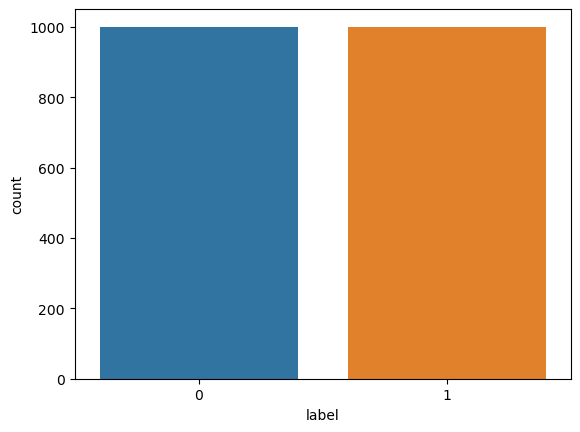

In [6]:
sns.countplot(x='label',data=y1)

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [9]:
ytrain_proba=rf_model.predict_proba(xtrain)
print('rf train roc_score:{}'.format(roc_auc_score(ytrain,ytrain_proba[:,1])))

rf train roc_score:1.0


In [10]:
ytest_proba=rf_model.predict_proba(xtest)
print('rf test roc_score:{}'.format(roc_auc_score(ytest,ytest_proba[:,1])))

rf test roc_score:0.9903258145363409


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf_model=RandomForestClassifier()
log_classifier=LogisticRegression()
ada_classifier=AdaBoostClassifier()
knn_classifier=KNeighborsClassifier()
classifiers=[rf_model,log_classifier,ada_classifier,knn_classifier]

rf train roc_score:1.0
rf test roc_score:0.9898120300751879


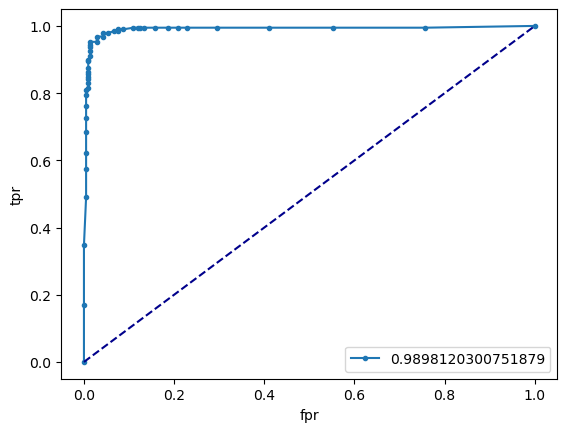

rf train roc_score:0.9729543895399261
rf test roc_score:0.9898120300751879


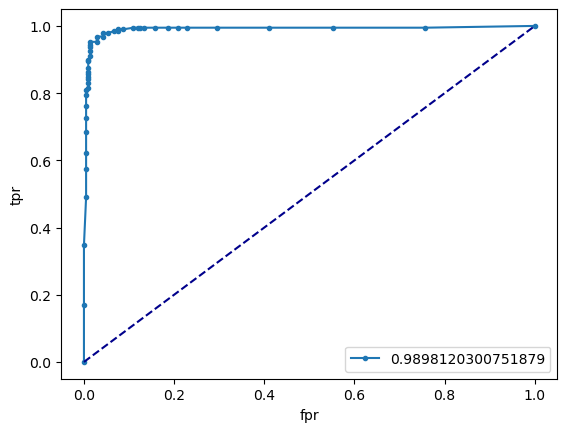

rf train roc_score:0.9963956375728804
rf test roc_score:0.9898120300751879


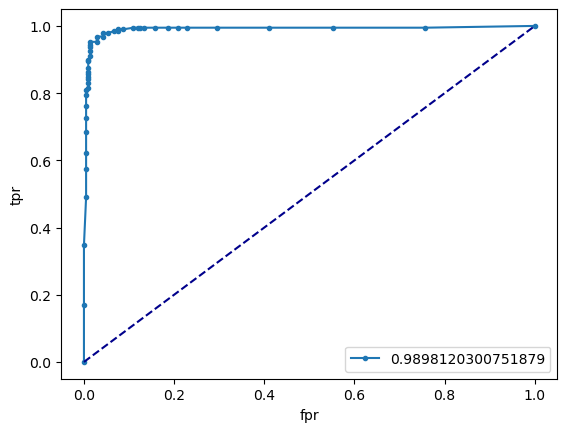

rf train roc_score:0.9866811268301144
rf test roc_score:0.9898120300751879


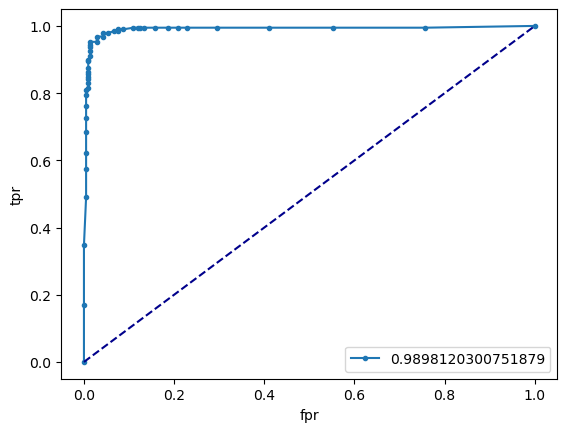

In [13]:
for classifier in classifiers:
    classifier.fit(xtrain,ytrain)
    ytrain_proba=classifier.predict_proba(xtrain)
    print('rf train roc_score:{}'.format(roc_auc_score(ytrain,ytrain_proba[:,1])))
    ytest_proba=rf_model.predict_proba(xtest)
    print('rf test roc_score:{}'.format(roc_auc_score(ytest,ytest_proba[:,1])))
    fpr,tpr,threshold=roc_curve(ytest,ytest_proba[:,1])
    auc1=auc(fpr,tpr)
    
    plt.plot(fpr,tpr,marker='.',label=auc1)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend()
    plt.show()

In [15]:
pred=[]
for model in classifiers:
    pred.append(pd.Series(model.predict_proba(xtest)[:,1]))
print(pred)

[0      0.02
1      0.86
2      0.01
3      0.14
4      1.00
       ... 
395    0.99
396    0.83
397    0.00
398    0.01
399    0.01
Length: 400, dtype: float64, 0      0.000093
1      0.999914
2      0.012092
3      0.733534
4      0.943983
         ...   
395    0.802105
396    0.994511
397    0.000011
398    0.071453
399    0.007575
Length: 400, dtype: float64, 0      0.301239
1      0.677093
2      0.480669
3      0.509855
4      0.533184
         ...   
395    0.520936
396    0.532453
397    0.299256
398    0.460848
399    0.460258
Length: 400, dtype: float64, 0      0.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
395    0.6
396    1.0
397    0.0
398    0.4
399    0.0
Length: 400, dtype: float64]


In [16]:
final_pred=pd.concat(pred,axis=1)
print((final_pred))

        0         1         2    3
0    0.02  0.000093  0.301239  0.0
1    0.86  0.999914  0.677093  1.0
2    0.01  0.012092  0.480669  0.0
3    0.14  0.733534  0.509855  1.0
4    1.00  0.943983  0.533184  1.0
..    ...       ...       ...  ...
395  0.99  0.802105  0.520936  0.6
396  0.83  0.994511  0.532453  1.0
397  0.00  0.000011  0.299256  0.0
398  0.01  0.071453  0.460848  0.4
399  0.01  0.007575  0.460258  0.0

[400 rows x 4 columns]


In [18]:
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
final_prediction

0      0.080333
1      0.884252
2      0.125690
3      0.595847
4      0.869292
         ...   
395    0.728260
396    0.839241
397    0.074817
398    0.235575
399    0.119458
Length: 400, dtype: float64

In [19]:
print('ensembled test roc score:{}'.format(roc_auc_score(ytest,final_prediction)))

ensembled test roc score:0.9896741854636592


In [20]:
fpr,tpr,threshold=roc_curve(ytest,final_prediction)
threshold

array([       inf, 0.92640522, 0.84356285, 0.84190436, 0.7713796 ,
       0.77053071, 0.7510894 , 0.74678997, 0.7274547 , 0.71088821,
       0.66412515, 0.59584721, 0.56833657, 0.55445735, 0.4892824 ,
       0.47203342, 0.46040494, 0.3584388 , 0.34810825, 0.32038288,
       0.31124788, 0.29949305, 0.2978452 , 0.11819649, 0.1180553 ,
       0.06802513])

In [24]:
from sklearn.metrics import accuracy_score,precision_score
accuracy_ls=[]
for thres in threshold:
    y_pred=np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(ytest,y_pred))
print(accuracy_ls)

[0.525, 0.525, 0.815, 0.8175, 0.925, 0.9275, 0.93, 0.9325, 0.94, 0.9425, 0.955, 0.95, 0.9525, 0.9525, 0.96, 0.9625, 0.96, 0.9375, 0.935, 0.93, 0.9275, 0.9175, 0.915, 0.6175, 0.615, 0.4775]


In [25]:
accuracy_ls=pd.concat([pd.Series(threshold),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns=['threshold','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)

In [30]:
accuracy_ls

,threshold,accuracy
15,0.472033,0.9625
16,0.460405,0.9600
14,0.489282,0.9600
10,0.664125,0.9550
13,0.554457,0.9525
12,0.568337,0.9525
11,0.595847,0.9500
9,0.710888,0.9425
8,0.727455,0.9400
17,0.358439,0.9375


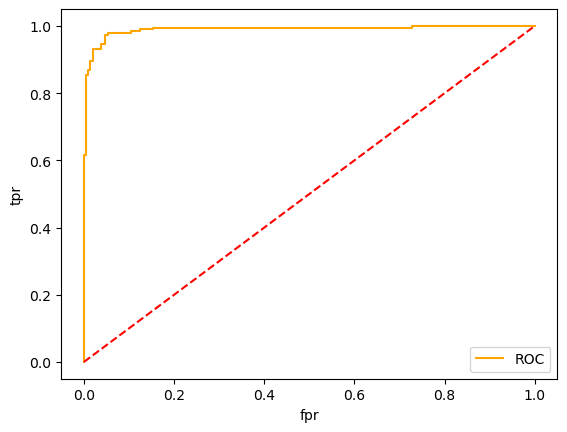

In [32]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()